# MALIGNANT COMMENTS CLASSIFICATION


Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is aproblem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.   
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 
Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful.
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID:It includes unique Ids associated with each comment text given. 
-	Comment text: This column contains the comments extracted from various social media platforms. 


In [1]:
#import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading train dataset

df_train=pd.read_csv('C:/Users/HP/Documents/projects/Malignent Comments project/train.csv')
df_train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [3]:
df_train.shape

(159571, 8)

# Data cleaning and Text exploration.

In [4]:
# ckecking null value

df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

##### There is no null values in this data set.

In [5]:
# showing all text data

pd.set_option('display.max_colwidth',None)
df_train['comment_text'].head(10)

0                                                                                                                                                                                                                                                                                                                                                                             Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
1                                                                                                                                                                                                                                                                                                                                                                               

### Lower case

##### The first pre-processing step which we will do is transform our comments into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [6]:
df_train['comment_text']=df_train['comment_text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df_train['comment_text'].head()

0                                                                                                                                                                                                                                                                                                                                                                       explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27
1                                                                                                                                                                                                                                                                                                                                                                                      

###  Removal of Stop Words

##### stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [7]:
pip install nltk

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stop=stopwords.words('english')

# create number of stopwords column
df_train["com_stopwords"]=df_train['comment_text'].apply(lambda x: len([x for x in x.split() if x in stop]))

# removeing of stop words from column comment_text
df_train['comment_text']=df_train['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_train.head()

id  \
0  0000997932d777bf   
1  000103f0d9cfb60f   
2  000113f07ec002fd   
3  0001b41b1c6bb37e   
4  0001d958c54c6e35   

                                                                                                                                                                                                                                                                                                                                                                                                                   comment_text  \
0                                                                                                                                                                                                                                        explanation edits made username hardcore metallica fan reverted? vandalisms, closure gas voted new york dolls fac. please remove template talk page since i'm retired now.89.205.38.27   
1                                                                                                                                                                                                                                                                                                                       d'aww! matches background colour i'm seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)   
2                                                                                                                                                                                                                                                                         hey man, i'm really trying edit war. guy constantly removing relevant information talking edits instead talk page. seems care formatting actual info.   
3  " can't make real suggestions improvement - wondered section statistics later on, subsection ""types accidents"" -i think references may need tidying exact format ie date format etc. later on, no-one else first - preferences formatting style references want please let know. appears backlog articles review guess may delay reviewer turns up. listed relevant form eg wikipedia:good_article_nominations#transport "   
4                                                                                                                                                                                                                                                                                                                                                                               you, sir, hero. chance remember page that's on?   

   malignant  highly_malignant  rude  threat  abuse  loathe  com_stopwords  
0          0                 0     0       0      0       0             18  
1          0                 0     0       0      0       0              2  
2          0                 0     0       0      0       0             20  
3          0                 0     0       0      0       0             56  
4          0                 0     0       0      0       0              5

### Common word removing

##### Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [10]:
freq = pd.Series(' '.join(df_train['comment_text']).split()).value_counts()[:20]
freq

"            81755
article      39018
would        29058
page         28731
please       27513
like         26338
one          24636
-            23348
talk         22839
wikipedia    22438
think        18970
see          18771
i'm          17305
also         16371
know         16365
may          15265
edit         15133
people       15026
use          14494
get          13125
dtype: int64

##### Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [11]:
freq = list(freq.index)
df_train['comment_text']=df_train['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

df_train["comment_text"].head()

0                                                                                                                                                                                                                                  explanation edits made username hardcore metallica fan reverted? vandalisms, closure gas voted new york dolls fac. remove template since retired now.89.205.38.27
1                                                                                                                                                                                                                                                                                                d'aww! matches background colour seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)
2                                                                                                                                                                                                                             

## Rare words Removal

In [12]:
# see rarely use words
freq=pd.Series(''.join(df_train['comment_text']).split()).value_counts()[-30:]
freq

life?????well,          1
goodbye.abuse           1
159.223.28.79ophelia    1
(whisper...)nôze        1
1663                    1
ludwigs2thanks          1
nucleus,                1
75.74.130.115           1
19:34                   1
john!).                 1
matanui                 1
."warning               1
onih's                  1
planimeter,             1
zetian                  1
souraces                1
weiner.                 1
(t-c-l)thank            1
leap.imperial!          1
ottal                   1
propping                1
eliasalucard            1
""warlordism""          1
motherfuckerfuck        1
you!!!!!!!!!!           1
stat-point              1
ivwelcome               1
image:blown-out         1
of?also,                1
true.)                  1
dtype: int64

In [13]:
# removing rare words
freq=list(freq.index)

df_train['comment_text']=df_train['comment_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))
df_train['comment_text'].head()

0                                                                                                                                                                                                                                  explanation edits made username hardcore metallica fan reverted? vandalisms, closure gas voted new york dolls fac. remove template since retired now.89.205.38.27
1                                                                                                                                                                                                                                                                                                d'aww! matches background colour seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)
2                                                                                                                                                                                                                             

In [14]:
# create com_word_count column by useing comments column

df_train['com_word_count']=df_train['comment_text'].apply(lambda x: len(str(x).split(" ")))
df_train[['comment_text','com_word_count']].head()

comment_text  \
0                                                                                                                                                                                                                                explanation edits made username hardcore metallica fan reverted? vandalisms, closure gas voted new york dolls fac. remove template since retired now.89.205.38.27   
1                                                                                                                                                                                                                                                                                              d'aww! matches background colour seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)   
2                                                                                                                                                                                                                                                          hey man, really trying war. guy constantly removing relevant information talking edits instead page. seems care formatting actual info.   
3  can't make real suggestions improvement wondered section statistics later on, subsection ""types accidents"" -i references need tidying exact format ie date format etc. later on, no-one else first preferences formatting style references want let know. appears backlog articles review guess delay reviewer turns up. listed relevant form eg wikipedia:good_article_nominations#transport   
4                                                                                                                                                                                                                                                                                                                                                       you, sir, hero. chance remember that's on?   

   com_word_count  
0              21  
1              14  
2              19  
3              49  
4               7

In [15]:
# create column number of numerics from comment text

df_train['com_numeric']=df_train['comment_text'].apply(lambda x: len([x for x in x.split() if x.isdigit]))

df_train[['comment_text','com_numeric']].head()

comment_text  \
0                                                                                                                                                                                                                                explanation edits made username hardcore metallica fan reverted? vandalisms, closure gas voted new york dolls fac. remove template since retired now.89.205.38.27   
1                                                                                                                                                                                                                                                                                              d'aww! matches background colour seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)   
2                                                                                                                                                                                                                                                          hey man, really trying war. guy constantly removing relevant information talking edits instead page. seems care formatting actual info.   
3  can't make real suggestions improvement wondered section statistics later on, subsection ""types accidents"" -i references need tidying exact format ie date format etc. later on, no-one else first preferences formatting style references want let know. appears backlog articles review guess delay reviewer turns up. listed relevant form eg wikipedia:good_article_nominations#transport   
4                                                                                                                                                                                                                                                                                                                                                       you, sir, hero. chance remember that's on?   

   com_numeric  
0           21  
1           14  
2           19  
3           49  
4            7

## Coverting comments column into number of characters

In [16]:
# creating one more com_char_count column by useing comment text column

df_train['comment_text']=df_train['comment_text'].str.len()
df_train['comment_text'].head()

0    161
1     99
2    135
3    383
4     42
Name: comment_text, dtype: int64

# Summary Statistics

In [17]:
# use describe fuction
df_train.describe(include='all')

id   comment_text      malignant  highly_malignant  \
count             159571  159571.000000  159571.000000     159571.000000   
unique            159571            NaN            NaN               NaN   
top     dbbe732ad4ce2390            NaN            NaN               NaN   
freq                   1            NaN            NaN               NaN   
mean                 NaN     260.050573       0.095844          0.009996   
std                  NaN     409.366507       0.294379          0.099477   
min                  NaN       0.000000       0.000000          0.000000   
25%                  NaN      62.000000       0.000000          0.000000   
50%                  NaN     133.000000       0.000000          0.000000   
75%                  NaN     282.000000       0.000000          0.000000   
max                  NaN    5000.000000       1.000000          1.000000   

                 rude         threat          abuse         loathe  \
count   159571.000000  159571.000000  159571.000000  159571.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.052948       0.002996       0.049364       0.008805   
std          0.223931       0.054650       0.216627       0.093420   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max          1.000000       1.000000       1.000000       1.000000   

        com_stopwords  com_word_count    com_numeric  
count   159571.000000   159571.000000  159571.000000  
unique            NaN             NaN            NaN  
top               NaN             NaN            NaN  
freq              NaN             NaN            NaN  
mean        30.200237       34.023356      34.023306  
std         45.296458       53.351204      53.351236  
min          0.000000        1.000000       0.000000  
25%          7.000000        9.000000       9.000000  
50%         16.000000       18.000000      18.000000  
75%         35.000000       37.000000      37.000000  
max        902.000000     1250.000000    1250.000000

In [18]:
# see information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  int64 
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
 8   com_stopwords     159571 non-null  int64 
 9   com_word_count    159571 non-null  int64 
 10  com_numeric       159571 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 13.4+ MB


In [19]:
# see frequncies and uniqure values

for i in df_train.columns:
    u=df_train[i].unique()
    v=df_train[i].value_counts()
    print('>>>>>>>>>>>',i)
    print(u)
    print(v)
    print("\n")

>>>>>>>>>>> id
['0000997932d777bf' '000103f0d9cfb60f' '000113f07ec002fd' ...
 'ffee36eab5c267c9' 'fff125370e4aaaf3' 'fff46fc426af1f9a']
dbbe732ad4ce2390    1
5917693cb16d3a59    1
fd21961769786312    1
e0eeb6f6f0b7bbf7    1
c4a593c7bd28cfea    1
                   ..
7fd30d96d354f81d    1
42266d86e0751663    1
e09f7ad242f6d5f7    1
c7985d8f054e12b5    1
2a23467e219fc50b    1
Name: id, Length: 159571, dtype: int64


>>>>>>>>>>> comment_text
[ 161   99  135 ... 3175 1596 3323]
24      887
39      881
33      880
36      874
37      871
       ... 
2084      1
4005      1
1956      1
1700      1
3360      1
Name: comment_text, Length: 3208, dtype: int64


>>>>>>>>>>> malignant
[0 1]
0    144277
1     15294
Name: malignant, dtype: int64


>>>>>>>>>>> highly_malignant
[0 1]
0    157976
1      1595
Name: highly_malignant, dtype: int64


>>>>>>>>>>> rude
[0 1]
0    151122
1      8449
Name: rude, dtype: int64


>>>>>>>>>>> threat
[0 1]
0    159093
1       478
Name: threat, dtype: int64


>>>>>

In [20]:
# droping id column 
df_train.drop('id',inplace=True,axis=1)

# Data visualization

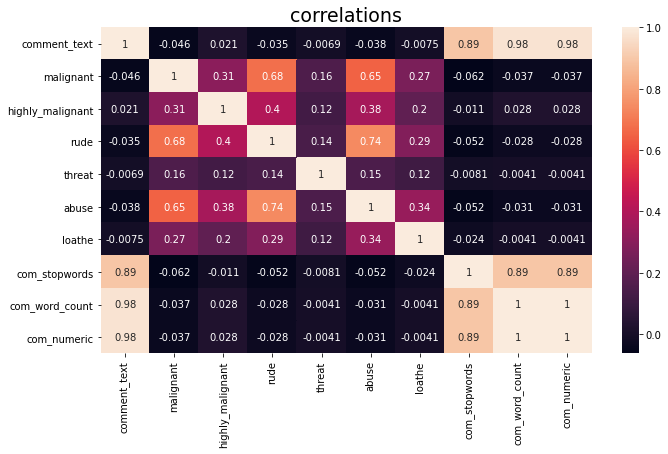

In [21]:
# checking correletions on heatmap
plt.figure(figsize=(11,6))
sns.heatmap(df_train.corr(),annot=True)
plt.title('correlations',fontsize=19)
plt.show()

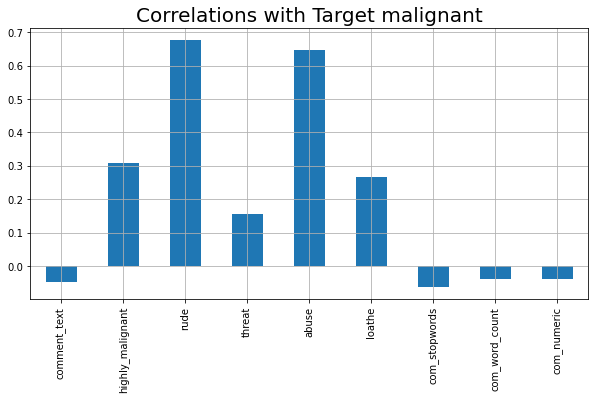

In [22]:
# correlation with target values

plt.figure(figsize=(10,5))
df_train.drop('malignant',axis=1).corrwith(df_train['malignant']).plot(kind='bar',grid=True)
plt.title('Correlations with Target malignant',fontsize=20)
plt.show()

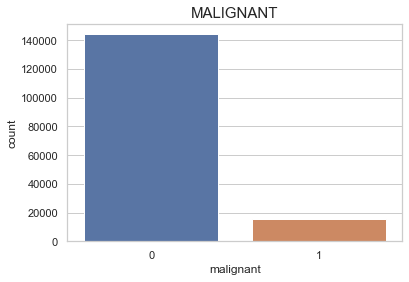

0    144277
1     15294
Name: malignant, dtype: int64

In [23]:
# showing malignant Frequency

sns.set(style=('whitegrid'))
sns.countplot(df_train['malignant'])
plt.title('MALIGNANT',fontsize=15)
plt.show()
df_train['malignant'].value_counts()

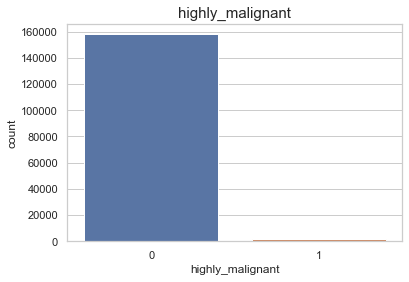

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [24]:
# showing highly_malignant Frequency

sns.countplot(df_train['highly_malignant'])
plt.title('highly_malignant',fontsize=15)
plt.show()
df_train['highly_malignant'].value_counts()

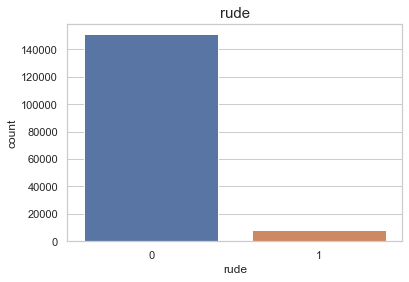

0    151122
1      8449
Name: rude, dtype: int64

In [25]:
# showing rude Frequency

sns.countplot(df_train['rude'])
plt.title('rude',fontsize=15)
plt.show()
df_train['rude'].value_counts()

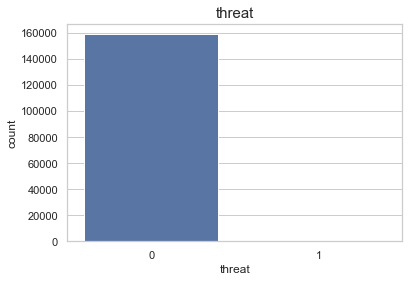

0    159093
1       478
Name: threat, dtype: int64

In [26]:
# showing threat Frequency

sns.countplot(df_train['threat'])
plt.title('threat',fontsize=15)
plt.show()
df_train['threat'].value_counts()

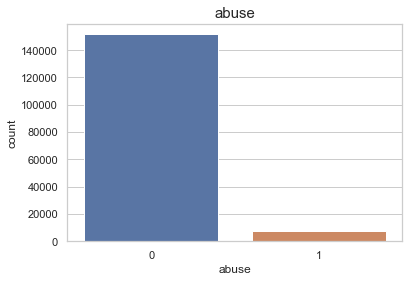

0    151694
1      7877
Name: abuse, dtype: int64

In [27]:
# showing abuse Frequency


sns.countplot(df_train['abuse'])
plt.title('abuse',fontsize=15)
plt.show()
df_train['abuse'].value_counts()

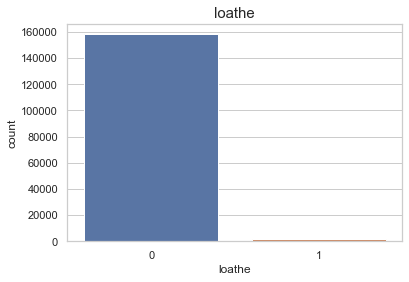

0    158166
1      1405
Name: loathe, dtype: int64

In [28]:
# showing loathe Frequency


sns.countplot(df_train['loathe'])
plt.title('loathe',fontsize=15)
plt.show()
df_train['loathe'].value_counts()

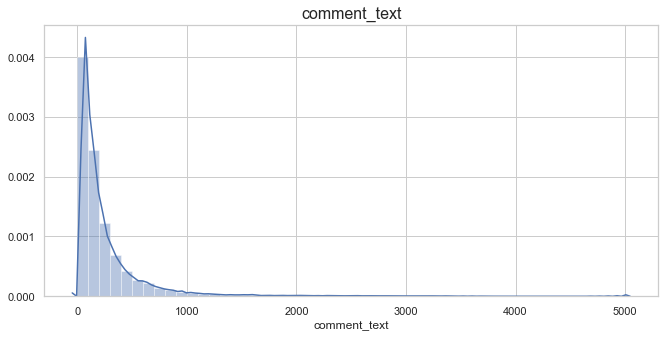

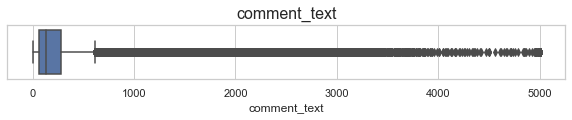

In [29]:
# showing comment_text distribution

plt.figure(figsize=(11,5))
sns.distplot(df_train['comment_text'])
plt.title('comment_text',fontsize=16)
plt.show()

plt.figure(figsize=(10,1))
sns.boxplot(df_train['comment_text'])
plt.title('comment_text',fontsize=16)
plt.show()


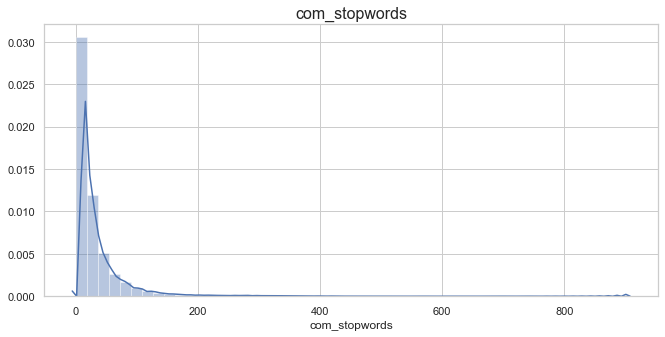

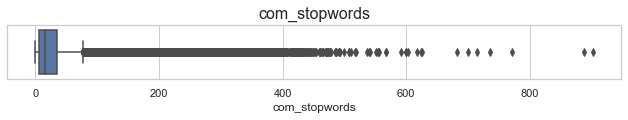

In [30]:
# showing com_stopwords distribution

plt.figure(figsize=(11,5))
sns.distplot(df_train['com_stopwords'])
plt.title('com_stopwords',fontsize=16)
plt.show()

plt.figure(figsize=(11,1))
sns.boxplot(df_train['com_stopwords'])
plt.title('com_stopwords',fontsize=16)
plt.show()

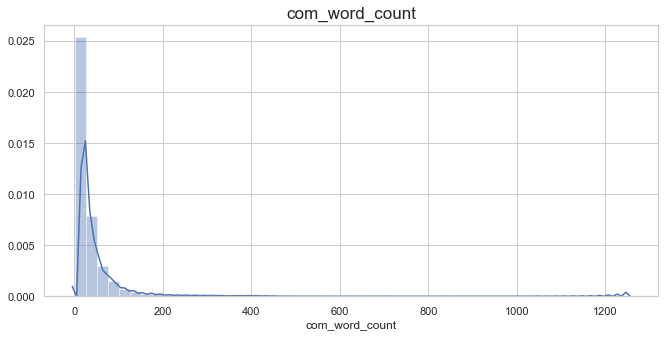

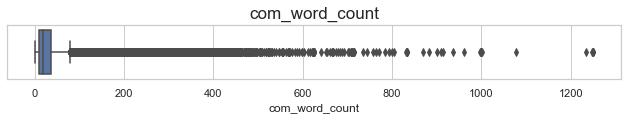

In [31]:
# showing com_stopwords distribution

plt.figure(figsize=(11,5))
sns.distplot(df_train['com_word_count'])
plt.title('com_word_count',fontsize=17)
plt.show()

plt.figure(figsize=(11,1))
sns.boxplot(df_train['com_word_count'])
plt.title('com_word_count',fontsize=17)
plt.show()

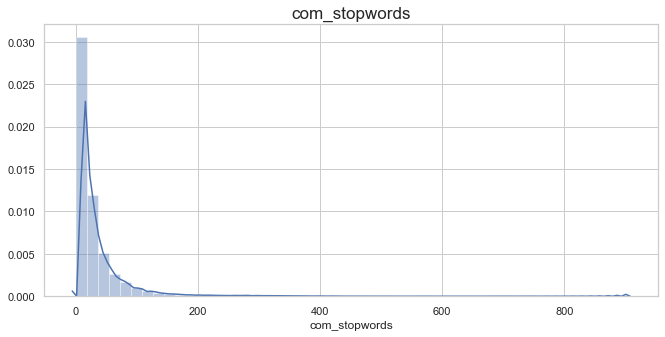

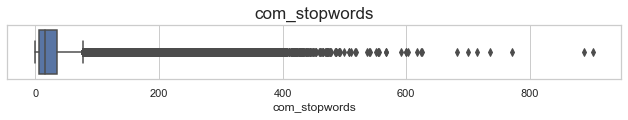

In [32]:
# showing com_stopwords distribution

plt.figure(figsize=(11,5))
sns.distplot(df_train['com_stopwords'])
plt.title('com_stopwords',fontsize=17)
plt.show()

plt.figure(figsize=(11,1))
sns.boxplot(df_train['com_stopwords'])
plt.title('com_stopwords',fontsize=17)
plt.show()

# Model Training - Malignant

In [33]:
# importing model libraries

import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# importing libraries for spliting data into train and test

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# importing metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

# importing library for standardization

from sklearn.preprocessing import StandardScaler

In [34]:
# spliting dataset into input/output

y=df_train['malignant']
X=df_train.drop(['malignant','highly_malignant','rude','threat','abuse','loathe'], axis=1)

# standeldization for input data
scaler=StandardScaler()
x=scaler.fit_transform(X)

# creating datafram
x=pd.DataFrame(x,columns=X.columns)
print(x)

        comment_text  com_stopwords  com_word_count  com_numeric
0          -0.241961      -0.269343       -0.244107    -0.244106
1          -0.393415      -0.622572       -0.375313    -0.375312
2          -0.305474      -0.225189       -0.281594    -0.281593
3           0.300342       0.569578        0.280719     0.280720
4          -0.532655      -0.556342       -0.506520    -0.506519
...              ...            ...             ...          ...
159566     -0.119821      -0.247266       -0.150388    -0.150387
159567     -0.525327      -0.423881       -0.525264    -0.525262
159568     -0.486242      -0.622572       -0.487776    -0.487775
159569     -0.498456      -0.335573       -0.469032    -0.469031
159570     -0.329902      -0.379727       -0.262851    -0.262850

[159571 rows x 4 columns]


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.8759682149750583
Score: 0.9337722889754174
[[34698  1380]
 [ 3568   247]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     36078
           1       0.15      0.06      0.09      3815

    accuracy                           0.88     39893
   macro avg       0.53      0.51      0.51     39893
weighted avg       0.83      0.88      0.85     39893



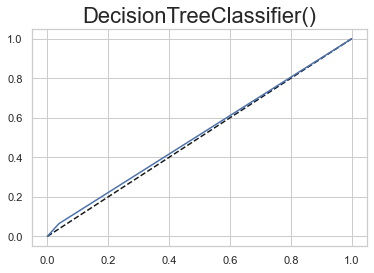

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.8974757476248966
Score: 0.904610705392804
[[35643   435]
 [ 3655   160]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     36078
           1       0.27      0.04      0.07      3815

    accuracy                           0.90     39893
   macro avg       0.59      0.51      0.51     39893
weighted avg       0.85      0.90      0.86     39893



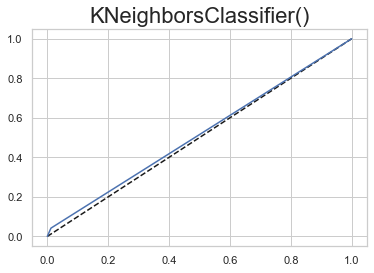

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> GaussianNB() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.881808838643371
Score: 0.8812897942813216
[[35095   983]
 [ 3732    83]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     36078
           1       0.08      0.02      0.03      3815

    accuracy                           0.88     39893
   macro avg       0.49      0.50      0.49     39893
weighted avg       0.82      0.88      0.85     39893



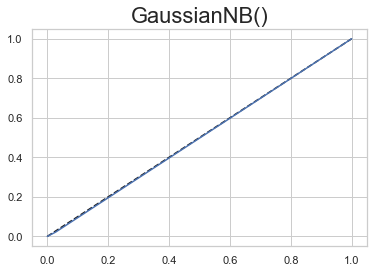

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9046699922292132
Score: 0.9045856381289794
[[36067    11]
 [ 3792    23]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     36078
           1       0.68      0.01      0.01      3815

    accuracy                           0.90     39893
   macro avg       0.79      0.50      0.48     39893
weighted avg       0.88      0.90      0.86     39893



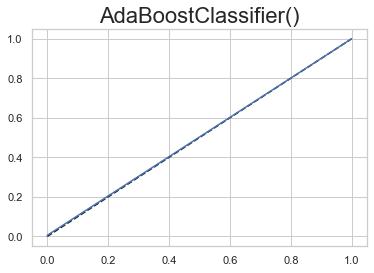

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.8896046925525781
Score: 0.9337388659569845
[[35293   785]
 [ 3619   196]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     36078
           1       0.20      0.05      0.08      3815

    accuracy                           0.89     39893
   macro avg       0.55      0.51      0.51     39893
weighted avg       0.84      0.89      0.86     39893



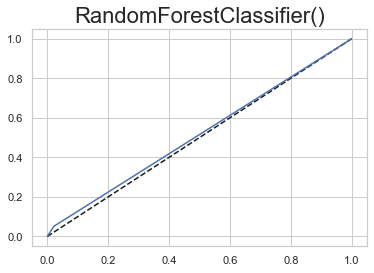

In [35]:
# splting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Appying algorithms
models=[DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),AdaBoostClassifier(),RandomForestClassifier()]
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',i,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('AC:',accuracy_score(y_test,pred))
    print('Score:',i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    # roc_courve
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot([0,1],[0,1],'--k')
    plt.plot(fpr,tpr,label=i)
    plt.title(i,fontsize=22)
    plt.show()

## Cross validation score

In [36]:
# create loop for all algorithms

for i in models:
    print('>>>>>>>>>>>>>>>>>>>>>>',i)
    cross=cross_val_score(i,x,y,cv=5)
    print(cross.mean())
    print(cross)
    print('\n')

>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier()
0.8751026222154241
[0.87457308 0.87438115 0.87419314 0.87525851 0.87710723]


>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier()
0.8954008062813257
[0.89334169 0.89634643 0.89568841 0.89487372 0.89675378]


>>>>>>>>>>>>>>>>>>>>>> GaussianNB()
0.8820086302162661
[0.88287639 0.88425143 0.88124334 0.87986464 0.88180736]


>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier()
0.904475122615042
[0.90468432 0.90455599 0.90436799 0.90436799 0.90439932]


>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier()
0.8905565477155623
[0.89168103 0.89051827 0.8893589  0.88942157 0.89180297]




AC: 0.881808838643371
Score: 0.8812897942813216
[[35095   983]
 [ 3732    83]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     36078
           1       0.08      0.02      0.03      3815

    accuracy                           0.88     39893
   macro avg       0.49      0.50      0.49     39893
weighted avg       0.82      0.88      0.85     39893



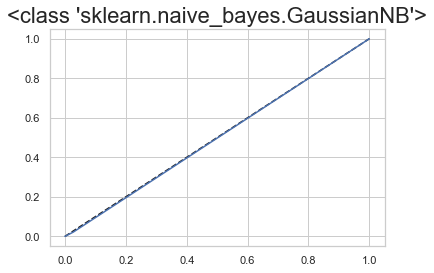

In [37]:
# creating final best model

gnb=GaussianNB()
gnb.fit(x_train,y_train) 
pred=gnb.predict(x_test)
print('AC:',accuracy_score(y_test,pred))
print('Score:',gnb.score(x_train,y_train))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# roc_courve
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot([0,1],[0,1],'--k')
plt.plot(fpr,tpr,label=i)
plt.title(GaussianNB,fontsize=22)
plt.show()

In [38]:
# saveing final model

import joblib

joblib.dump(gnb,'Malignant_Comments.pkl')

['Malignant_Comments.pkl']

# Model Training - highly_malignant

In [40]:
# spliting dataset into input/output

y=df_train['highly_malignant']
print(y)
X=df_train.drop(['malignant','highly_malignant','rude','threat','abuse','loathe'], axis=1)

# standeldization for input data
scaler=StandardScaler()
x=scaler.fit_transform(X)

# creating datafram
x=pd.DataFrame(x,columns=X.columns)
print(x)

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: highly_malignant, Length: 159571, dtype: int64
        comment_text  com_stopwords  com_word_count  com_numeric
0          -0.241961      -0.269343       -0.244107    -0.244106
1          -0.393415      -0.622572       -0.375313    -0.375312
2          -0.305474      -0.225189       -0.281594    -0.281593
3           0.300342       0.569578        0.280719     0.280720
4          -0.532655      -0.556342       -0.506520    -0.506519
...              ...            ...             ...          ...
159566     -0.119821      -0.247266       -0.150388    -0.150387
159567     -0.525327      -0.423881       -0.525264    -0.525262
159568     -0.486242      -0.622572       -0.487776    -0.487775
159569     -0.498456      -0.335573       -0.469032    -0.469031
159570     -0.329902      -0.379727       -0.262851    -0.262850

[159571 rows x 4 columns]


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9864637906399619
Score: 0.9931315697120607
[[39342   145]
 [  395    11]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39487
           1       0.07      0.03      0.04       406

    accuracy                           0.99     39893
   macro avg       0.53      0.51      0.52     39893
weighted avg       0.98      0.99      0.98     39893



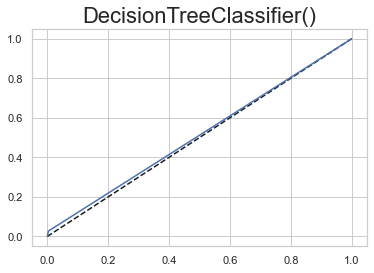

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9897475747624896
Score: 0.9902237671084075
[[39481     6]
 [  403     3]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39487
           1       0.33      0.01      0.01       406

    accuracy                           0.99     39893
   macro avg       0.66      0.50      0.50     39893
weighted avg       0.98      0.99      0.98     39893



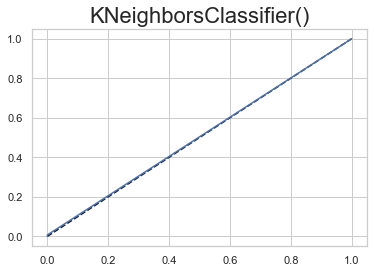

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> GaussianNB() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9588649637781065
Score: 0.9583465632781296
[[38221  1266]
 [  375    31]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     39487
           1       0.02      0.08      0.04       406

    accuracy                           0.96     39893
   macro avg       0.51      0.52      0.51     39893
weighted avg       0.98      0.96      0.97     39893



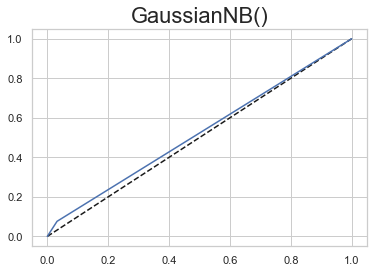

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9897977088712305
Score: 0.9900733635254599
[[39483     4]
 [  403     3]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39487
           1       0.43      0.01      0.01       406

    accuracy                           0.99     39893
   macro avg       0.71      0.50      0.50     39893
weighted avg       0.98      0.99      0.98     39893



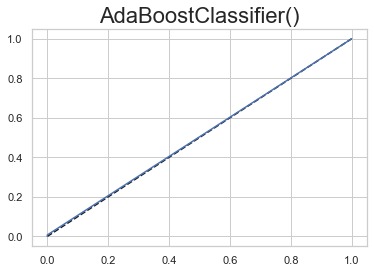

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9887448925876721
Score: 0.9931232139574525
[[39438    49]
 [  400     6]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39487
           1       0.11      0.01      0.03       406

    accuracy                           0.99     39893
   macro avg       0.55      0.51      0.51     39893
weighted avg       0.98      0.99      0.98     39893



In [41]:
# splting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Appying algorithms
models=[DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),AdaBoostClassifier(),RandomForestClassifier()]
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',i,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('AC:',accuracy_score(y_test,pred))
    print('Score:',i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    # roc_courve
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot([0,1],[0,1],'--k')
    plt.plot(fpr,tpr,label=i)
    plt.title(i,fontsize=22)
    plt.show()

## cross validation

In [42]:
# create loop for all algorithms

for i in models:
    print('>>>>>>>>>>>>>>>>>>>>>>',i)
    cross=cross_val_score(i,x,y,cv=5)
    print(cross.mean())
    print(cross)
    print('\n')

>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier()
0.9866078437673407
[0.98637005 0.98674563 0.98640095 0.98709031 0.98643229]


>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier()
0.989872846332642
[0.9899107  0.98997305 0.98972238 0.98997305 0.98978505]


>>>>>>>>>>>>>>>>>>>>>> GaussianNB()
0.9583821578065861
[0.9590788  0.9570408  0.95788682 0.95845084 0.95945353]


>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier()
0.9899355139685829
[0.99003603 0.98984772 0.99000439 0.98984772 0.98994172]


>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier()
0.9889202920220802
[0.98900204 0.98881369 0.98900169 0.98906436 0.98871968]




In [43]:
# creating final best model

ada=AdaBoostClassifier()
ada.fit(x_train,y_train) 
pred=ada.predict(x_test)
print('AC:',accuracy_score(y_test,pred))
print('Score:',ada.score(x_train,y_train))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# roc_courve
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot([0,1],[0,1],'--k')
plt.plot(fpr,tpr,label=i)
plt.title(GaussianNB,fontsize=22)
plt.show()

AC: 0.9897977088712305
Score: 0.9900733635254599
[[39483     4]
 [  403     3]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39487
           1       0.43      0.01      0.01       406

    accuracy                           0.99     39893
   macro avg       0.71      0.50      0.50     39893
weighted avg       0.98      0.99      0.98     39893



# Model training - rude

In [45]:
# spliting dataset into input/output

y=df_train['rude']
print(y)
X=df_train.drop(['malignant','highly_malignant','rude','threat','abuse','loathe'], axis=1)

# standeldization for input data
scaler=StandardScaler()
x=scaler.fit_transform(X)

# creating datafram
x=pd.DataFrame(x,columns=X.columns)
print(x)

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: rude, Length: 159571, dtype: int64
        comment_text  com_stopwords  com_word_count  com_numeric
0          -0.241961      -0.269343       -0.244107    -0.244106
1          -0.393415      -0.622572       -0.375313    -0.375312
2          -0.305474      -0.225189       -0.281594    -0.281593
3           0.300342       0.569578        0.280719     0.280720
4          -0.532655      -0.556342       -0.506520    -0.506519
...              ...            ...             ...          ...
159566     -0.119821      -0.247266       -0.150388    -0.150387
159567     -0.525327      -0.423881       -0.525264    -0.525262
159568     -0.486242      -0.622572       -0.487776    -0.487775
159569     -0.498456      -0.335573       -0.469032    -0.469031
159570     -0.329902      -0.379727       -0.262851    -0.262850

[159571 rows x 4 columns]


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.929787180708395
Score: 0.9624074600177142
[[36998   752]
 [ 2049    94]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     37750
           1       0.11      0.04      0.06      2143

    accuracy                           0.93     39893
   macro avg       0.53      0.51      0.51     39893
weighted avg       0.90      0.93      0.92     39893



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9440252675908054
Score: 0.9474506592690386
[[37615   135]
 [ 2098    45]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37750
           1       0.25      0.02      0.04      2143

    accuracy                           0.94     39893
   macro avg       0.60      0.51      0.50     39893
weighted avg       0.91      0.94      0.92     39893



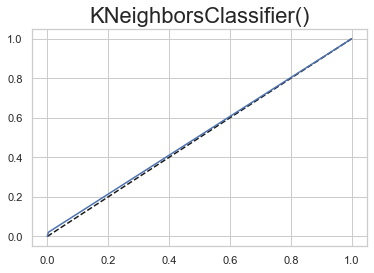

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> GaussianNB() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9269295365101647
Score: 0.9268370126506125
[[36922   828]
 [ 2087    56]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     37750
           1       0.06      0.03      0.04      2143

    accuracy                           0.93     39893
   macro avg       0.50      0.50      0.50     39893
weighted avg       0.90      0.93      0.91     39893



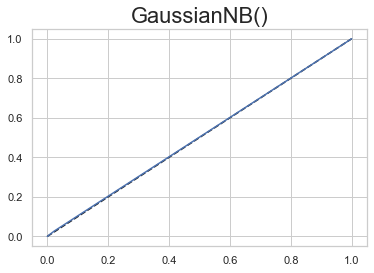

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9463063695385155
Score: 0.9472417654038336
[[37744     6]
 [ 2136     7]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37750
           1       0.54      0.00      0.01      2143

    accuracy                           0.95     39893
   macro avg       0.74      0.50      0.49     39893
weighted avg       0.92      0.95      0.92     39893



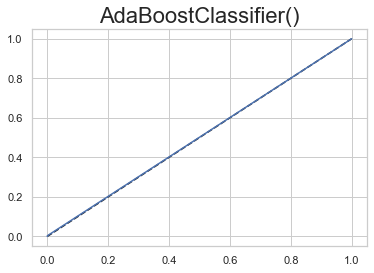

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9395382648584965
Score: 0.9623907485084978
[[37416   334]
 [ 2078    65]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37750
           1       0.16      0.03      0.05      2143

    accuracy                           0.94     39893
   macro avg       0.56      0.51      0.51     39893
weighted avg       0.91      0.94      0.92     39893



In [46]:
# splting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Appying algorithms
models=[DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),AdaBoostClassifier(),RandomForestClassifier()]
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',i,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('AC:',accuracy_score(y_test,pred))
    print('Score:',i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    # roc_courve
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot([0,1],[0,1],'--k')
    plt.plot(fpr,tpr,label=i)
    plt.title(i,fontsize=22)
    plt.show()

## Cross Validation

In [47]:
# create loop for all algorithms

for i in models:
    print('>>>>>>>>>>>>>>>>>>>>>>',i)
    cross=cross_val_score(i,x,y,cv=5)
    print(cross.mean())
    print(cross)
    print('\n')

>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier()
0.9305011564105715
[0.93047157 0.93009338 0.93040672 0.93078273 0.93075139]


>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier()
0.9438494486754709
[0.94347486 0.9441311  0.94315974 0.9429404  0.94554114]


>>>>>>>>>>>>>>>>>>>>>> GaussianNB()
0.9249424898190324
[0.92689958 0.92614527 0.92523657 0.92213449 0.92429655]


>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier()
0.9469828475558693
[0.94701551 0.94688851 0.94717052 0.94695118 0.94688851]


>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier()
0.9400078948662074
[0.9402162  0.94002632 0.93965031 0.93930563 0.94084101]




In [48]:
# creating final best model

ada=AdaBoostClassifier()
ada.fit(x_train,y_train) 
pred=ada.predict(x_test)
print('AC:',accuracy_score(y_test,pred))
print('Score:',ada.score(x_train,y_train))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


AC: 0.9463063695385155
Score: 0.9472417654038336
[[37744     6]
 [ 2136     7]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37750
           1       0.54      0.00      0.01      2143

    accuracy                           0.95     39893
   macro avg       0.74      0.50      0.49     39893
weighted avg       0.92      0.95      0.92     39893



# Model Training - Threat

In [49]:
# spliting dataset into input/output

y=df_train['threat']
print(y)
X=df_train.drop(['malignant','highly_malignant','rude','threat','abuse','loathe'], axis=1)

# standeldization for input data
scaler=StandardScaler()
x=scaler.fit_transform(X)

# creating datafram
x=pd.DataFrame(x,columns=X.columns)
print(x)

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: threat, Length: 159571, dtype: int64
        comment_text  com_stopwords  com_word_count  com_numeric
0          -0.241961      -0.269343       -0.244107    -0.244106
1          -0.393415      -0.622572       -0.375313    -0.375312
2          -0.305474      -0.225189       -0.281594    -0.281593
3           0.300342       0.569578        0.280719     0.280720
4          -0.532655      -0.556342       -0.506520    -0.506519
...              ...            ...             ...          ...
159566     -0.119821      -0.247266       -0.150388    -0.150387
159567     -0.525327      -0.423881       -0.525264    -0.525262
159568     -0.486242      -0.622572       -0.487776    -0.487775
159569     -0.498456      -0.335573       -0.469032    -0.469031
159570     -0.329902      -0.379727       -0.262851    -0.262850

[159571 rows x 4 columns]


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9960143383550999
Score: 0.9979277728571667
[[39731    57]
 [  102     3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39788
           1       0.05      0.03      0.04       105

    accuracy                           1.00     39893
   macro avg       0.52      0.51      0.52     39893
weighted avg       0.99      1.00      1.00     39893



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9973679592911037
Score: 0.9968833035311419
[[39788     0]
 [  105     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39788
           1       0.00      0.00      0.00       105

    accuracy                           1.00     39893
   macro avg       0.50      0.50      0.50     39893
weighted avg       0.99      1.00      1.00     39893



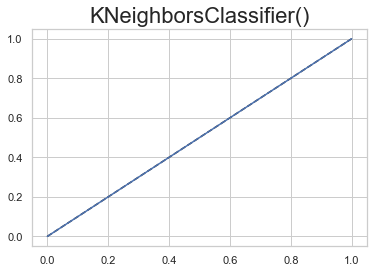

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> GaussianNB() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9721003684856993
Score: 0.9707381473620883
[[38778  1010]
 [  103     2]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     39788
           1       0.00      0.02      0.00       105

    accuracy                           0.97     39893
   macro avg       0.50      0.50      0.49     39893
weighted avg       0.99      0.97      0.98     39893



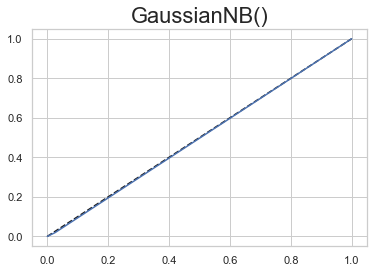

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9972927581279923
Score: 0.9968749477765337
[[39785     3]
 [  105     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39788
           1       0.00      0.00      0.00       105

    accuracy                           1.00     39893
   macro avg       0.50      0.50      0.50     39893
weighted avg       0.99      1.00      1.00     39893



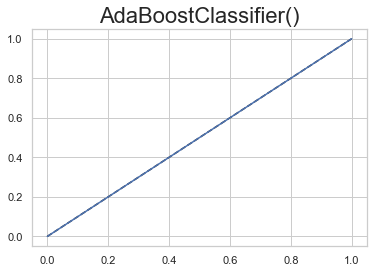

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9969418193668063
Score: 0.9979194171025585
[[39768    20]
 [  102     3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39788
           1       0.13      0.03      0.05       105

    accuracy                           1.00     39893
   macro avg       0.56      0.51      0.52     39893
weighted avg       1.00      1.00      1.00     39893



In [50]:
# splting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Appying algorithms
models=[DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),AdaBoostClassifier(),RandomForestClassifier()]
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',i,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('AC:',accuracy_score(y_test,pred))
    print('Score:',i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    # roc_courve
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot([0,1],[0,1],'--k')
    plt.plot(fpr,tpr,label=i)
    plt.title(i,fontsize=22)
    plt.show()

## cross validation

In [51]:
# create loop for all algorithms

for i in models:
    print('>>>>>>>>>>>>>>>>>>>>>>',i)
    cross=cross_val_score(i,x,y,cv=5)
    print(cross.mean())
    print(cross)
    print('\n')

>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier()
0.9958012416869476
[0.99586401 0.99589522 0.99583255 0.99573855 0.99567588]


>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier()
0.9970044683085165
[0.99699201 0.99702325 0.99702325 0.99699192 0.99699192]


>>>>>>>>>>>>>>>>>>>>>> GaussianNB()
0.9733284632027142
[0.97712674 0.97277057 0.97399261 0.97192455 0.97082785]


>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier()
0.9969606004135487
[0.99699201 0.99696058 0.99702325 0.99696058 0.99686658]


>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier()
0.9967161951410404
[0.99674134 0.99674124 0.99674124 0.99667857 0.99667857]




In [52]:
# creating final best model

kn=KNeighborsClassifier()
kn.fit(x_train,y_train) 
pred=kn.predict(x_test)
print('AC:',accuracy_score(y_test,pred))
print('Score:',kn.score(x_train,y_train))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

AC: 0.9973679592911037
Score: 0.9968833035311419
[[39788     0]
 [  105     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39788
           1       0.00      0.00      0.00       105

    accuracy                           1.00     39893
   macro avg       0.50      0.50      0.50     39893
weighted avg       0.99      1.00      1.00     39893



# Model Training - abuse



In [53]:
# spliting dataset into input/output

y=df_train['abuse']
print(y)
X=df_train.drop(['malignant','highly_malignant','rude','threat','abuse','loathe'], axis=1)

# standeldization for input data
scaler=StandardScaler()
x=scaler.fit_transform(X)

# creating datafram
x=pd.DataFrame(x,columns=X.columns)
print(x)

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: abuse, Length: 159571, dtype: int64
        comment_text  com_stopwords  com_word_count  com_numeric
0          -0.241961      -0.269343       -0.244107    -0.244106
1          -0.393415      -0.622572       -0.375313    -0.375312
2          -0.305474      -0.225189       -0.281594    -0.281593
3           0.300342       0.569578        0.280719     0.280720
4          -0.532655      -0.556342       -0.506520    -0.506519
...              ...            ...             ...          ...
159566     -0.119821      -0.247266       -0.150388    -0.150387
159567     -0.525327      -0.423881       -0.525264    -0.525262
159568     -0.486242      -0.622572       -0.487776    -0.487775
159569     -0.498456      -0.335573       -0.469032    -0.469031
159570     -0.329902      -0.379727       -0.262851    -0.262850

[159571 rows x 4 columns]


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9334971047552202
Score: 0.9646133792342787
[[37163   719]
 [ 1934    77]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     37882
           1       0.10      0.04      0.05      2011

    accuracy                           0.93     39893
   macro avg       0.52      0.51      0.51     39893
weighted avg       0.91      0.93      0.92     39893



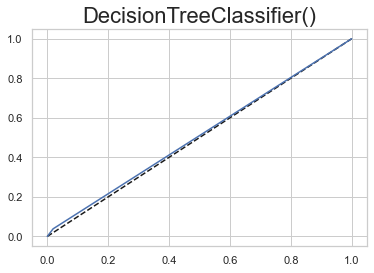

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9473090517133331
Score: 0.9502832600812179
[[37766   116]
 [ 1986    25]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37882
           1       0.18      0.01      0.02      2011

    accuracy                           0.95     39893
   macro avg       0.56      0.50      0.50     39893
weighted avg       0.91      0.95      0.93     39893



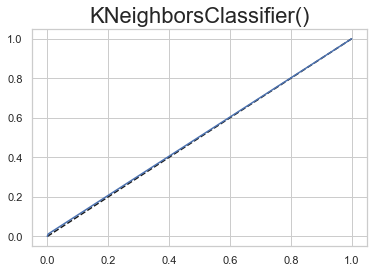

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> GaussianNB() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9309903993181762
Score: 0.9319340229616137
[[37100   782]
 [ 1971    40]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     37882
           1       0.05      0.02      0.03      2011

    accuracy                           0.93     39893
   macro avg       0.50      0.50      0.50     39893
weighted avg       0.90      0.93      0.92     39893



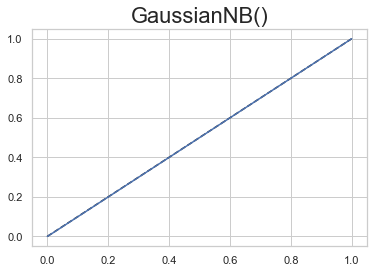

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9496152207154137
Score: 0.9510185664867394
[[37881     1]
 [ 2009     2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37882
           1       0.67      0.00      0.00      2011

    accuracy                           0.95     39893
   macro avg       0.81      0.50      0.49     39893
weighted avg       0.94      0.95      0.93     39893



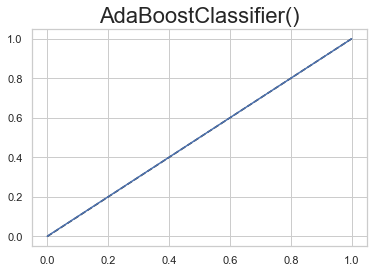

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9432983230140626
Score: 0.964588311970454
[[37591   291]
 [ 1971    40]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37882
           1       0.12      0.02      0.03      2011

    accuracy                           0.94     39893
   macro avg       0.54      0.51      0.50     39893
weighted avg       0.91      0.94      0.92     39893



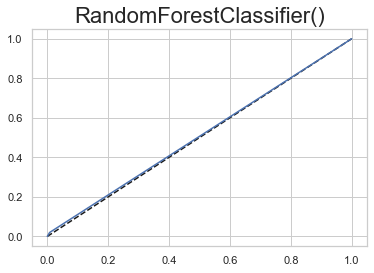

In [54]:
# splting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Appying algorithms
models=[DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),AdaBoostClassifier(),RandomForestClassifier()]
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',i,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('AC:',accuracy_score(y_test,pred))
    print('Score:',i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    # roc_courve
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot([0,1],[0,1],'--k')
    plt.plot(fpr,tpr,label=i)
    plt.title(i,fontsize=22)
    plt.show()

## cross Validation

In [55]:
# create loop for all algorithms

for i in models:
    print('>>>>>>>>>>>>>>>>>>>>>>',i)
    cross=cross_val_score(i,x,y,cv=5)
    print(cross.mean())
    print(cross)
    print('\n')

>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier()
0.9341546992612362
[0.93463888 0.9332268  0.93457417 0.93495018 0.93338347]


>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier()
0.9480419377900606
[0.94798684 0.94732719 0.9476092  0.9487999  0.94848656]


>>>>>>>>>>>>>>>>>>>>>> GaussianNB()
0.9302818079031546
[0.93191289 0.93087673 0.92840133 0.92764931 0.93256878]


>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier()
0.9506175928255249
[0.95071283 0.95039794 0.95071129 0.95061728 0.95064862]


>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier()
0.9437303718022305
[0.94457152 0.94341042 0.94325374 0.94375509 0.94366109]




In [56]:
# creating final best model

ada=AdaBoostClassifier()
ada.fit(x_train,y_train) 
pred=ada.predict(x_test)
print('AC:',accuracy_score(y_test,pred))
print('Score:',ada.score(x_train,y_train))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


AC: 0.9496152207154137
Score: 0.9510185664867394
[[37881     1]
 [ 2009     2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37882
           1       0.67      0.00      0.00      2011

    accuracy                           0.95     39893
   macro avg       0.81      0.50      0.49     39893
weighted avg       0.94      0.95      0.93     39893



# Model Training - loathe

In [57]:
# spliting dataset into input/output

y=df_train['loathe']
print(y)
X=df_train.drop(['malignant','highly_malignant','rude','threat','abuse','loathe'], axis=1)

# standeldization for input data
scaler=StandardScaler()
x=scaler.fit_transform(X)

# creating datafram
x=pd.DataFrame(x,columns=X.columns)
print(x)

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: loathe, Length: 159571, dtype: int64
        comment_text  com_stopwords  com_word_count  com_numeric
0          -0.241961      -0.269343       -0.244107    -0.244106
1          -0.393415      -0.622572       -0.375313    -0.375312
2          -0.305474      -0.225189       -0.281594    -0.281593
3           0.300342       0.569578        0.280719     0.280720
4          -0.532655      -0.556342       -0.506520    -0.506519
...              ...            ...             ...          ...
159566     -0.119821      -0.247266       -0.150388    -0.150387
159567     -0.525327      -0.423881       -0.525264    -0.525262
159568     -0.486242      -0.622572       -0.487776    -0.487775
159569     -0.498456      -0.335573       -0.469032    -0.469031
159570     -0.329902      -0.379727       -0.262851    -0.262850

[159571 rows x 4 columns]


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9875918080866317
Score: 0.9939504336636642
[[39394   142]
 [  353     4]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39536
           1       0.03      0.01      0.02       357

    accuracy                           0.99     39893
   macro avg       0.51      0.50      0.50     39893
weighted avg       0.98      0.99      0.99     39893



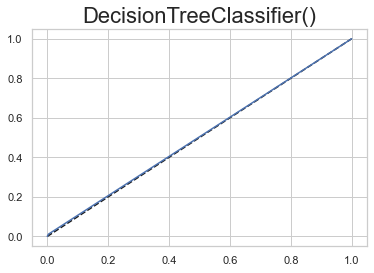

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9910259945353821
Score: 0.9912598806798242
[[39535     1]
 [  357     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39536
           1       0.00      0.00      0.00       357

    accuracy                           0.99     39893
   macro avg       0.50      0.50      0.50     39893
weighted avg       0.98      0.99      0.99     39893



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> GaussianNB() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9757100243150427
Score: 0.9751165627767844
[[38912   624]
 [  345    12]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     39536
           1       0.02      0.03      0.02       357

    accuracy                           0.98     39893
   macro avg       0.51      0.51      0.51     39893
weighted avg       0.98      0.98      0.98     39893



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9909507933722709
Score: 0.9912181019067832
[[39532     4]
 [  357     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39536
           1       0.00      0.00      0.00       357

    accuracy                           0.99     39893
   macro avg       0.50      0.50      0.50     39893
weighted avg       0.98      0.99      0.99     39893



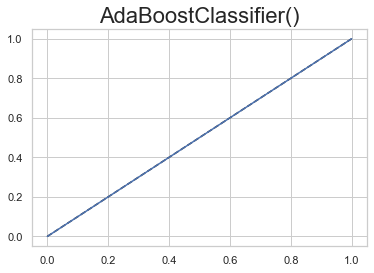

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.989822775925601
Score: 0.9939337221544478
[[39486    50]
 [  356     1]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39536
           1       0.02      0.00      0.00       357

    accuracy                           0.99     39893
   macro avg       0.51      0.50      0.50     39893
weighted avg       0.98      0.99      0.99     39893



In [58]:
# splting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Appying algorithms
models=[DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),AdaBoostClassifier(),RandomForestClassifier()]
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',i,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('AC:',accuracy_score(y_test,pred))
    print('Score:',i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    # roc_courve
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot([0,1],[0,1],'--k')
    plt.plot(fpr,tpr,label=i)
    plt.title(i,fontsize=22)
    plt.show()

## cross validation

In [59]:
# create loop for all algorithms

for i in models:
    print('>>>>>>>>>>>>>>>>>>>>>>',i)
    cross=cross_val_score(i,x,y,cv=5)
    print(cross.mean())
    print(cross)
    print('\n')

>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier()
0.9875603949361362
[0.98778004 0.98759165 0.98768566 0.98737231 0.98737231]


>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier()
0.9911387403937916
[0.99119536 0.99113242 0.99110108 0.99110108 0.99116375]


>>>>>>>>>>>>>>>>>>>>>> GaussianNB()
0.9732281970666289
[0.97659408 0.97584132 0.97311525 0.96882246 0.97176788]


>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier()
0.9911324735516533
[0.99119536 0.99119509 0.99119509 0.99100708 0.99106975]


>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier()
0.9900107146997191
[0.99025537 0.99041173 0.98984772 0.98987905 0.98965971]




In [60]:
# creating final best model

kn=KNeighborsClassifier()
kn.fit(x_train,y_train) 
pred=kn.predict(x_test)
print('AC:',accuracy_score(y_test,pred))
print('Score:',kn.score(x_train,y_train))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

AC: 0.9910259945353821
Score: 0.9912598806798242
[[39535     1]
 [  357     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39536
           1       0.00      0.00      0.00       357

    accuracy                           0.99     39893
   macro avg       0.50      0.50      0.50     39893
weighted avg       0.98      0.99      0.99     39893



In [61]:
# saving best model

joblib.dump(kn,'malignant_loathe.pkl')

['malignant_loathe.pkl']

# Predicting test data


In [62]:
# loading test data

df_text=pd.read_csv('C:/Users/HP/Documents/projects/Malignent Comments project/test.csv')
df_text.head()

id  \
0  00001cee341fdb12   
1  0000247867823ef7   
2  00013b17ad220c46   
3  00017563c3f7919a   
4  00017695ad8997eb   

                                                                                                                                                                                                                                                                                                                                                                      comment_text  
0  Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,  
1                                                                                                                                                                                                                                                                                                                             == From RfC == \n\n The title is fine as it is, IMO.  
2                                                                                                                                                                                                                                                                                                                       " \n\n == Sources == \n\n * Zawe Ashton on Lapland —  /  "  
3                                                                                                                                                                    :If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message.  
4                                                                                                                                                                                                                                                                                                                                        I don't anonymously edit articles at all.

In [63]:
# doing all step with test dataset

# convert in lower case
df_text['comment_text']=df_text['comment_text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
stop=stopwords.words('english')

# create number of stopwords column
df_text["com_stopwords"]=df_text['comment_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
# removeing of stop words from column comment_text
df_text['comment_text']=df_text['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Common word removing
freq = pd.Series(' '.join(df_text['comment_text']).split()).value_counts()[:20]
freq = list(freq.index)
df_text['comment_text']=df_text['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# removing rare words
freq=pd.Series(''.join(df_text['comment_text']).split()).value_counts()[-30:]
freq=list(freq.index)
df_text['comment_text']=df_text['comment_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

# create com_word_count column by useing comments column
df_text['com_word_count']=df_text['comment_text'].apply(lambda x: len(str(x).split(" ")))

# create column number of numerics from comment text
df_text['com_numeric']=df_text['comment_text'].apply(lambda x: len([x for x in x.split() if x.isdigit]))

# creating one more com_char_count column by useing comment text column
df_text['comment_text']=df_text['comment_text'].str.len()

# droping id column 
df_text.drop('id',inplace=True,axis=1)

df_text.head()

comment_text  com_stopwords  com_word_count  com_numeric
0           258             26              45           45
1            23              5               5            5
2            31              1               6            6
3           117             22              16           16
4            30              3               4            4